# Code Assigment 1

For this assignment you will use the following SVM implementation for classifying these datasets:

https://archive.ics.uci.edu/ml/datasets/banknote+authentication


https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+

You should:

1) Specify which Machine Learning problem are you solving.

2) Provide a short summary of the features and the labels you are working on.

3) Please answer the following questions: a) Are these datasets linearly separable? b) Are these datasets randomly chosen and c) The sample size is enough to guarantee generalization.

4) Provide an explanation how and why the code is working. You can add comments and/or formal explanations into the notebook.

5) Show some examples to illustrate that the method is working properly.

6) Provide quantitative evidence for generalization using the provided dataset.

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from models import  train_validation_test_split,SVM
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
np.random.seed(42)


import matplotlib.pyplot as plt
import seaborn as sns

# Occupancy model

1) Specify which Machine Learning problem are you solving.

2) Provide a short summary of the features and the labels you are working on.

3. Please answer the following questions: 
    1. Are these datasets linearly separable? 
    2. Are these datasets randomly chosen.
    3. The sample size is enough to guarantee generalization.

4) Provide an explanation how and why the code is working. You can add comments and/or formal explanations into the notebook.

5) Show some examples to illustrate that the method is working properly.

6) Provide quantitative evidence for generalization using the provided dataset.

## Solution

### 1 Specify which Machine Learning problem are you solving.
The machine learning problem in this case is to determine occupancy on offices, the data is obtained from https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+ , in this case we are in front of a classification problem,  where we try to classify each office into two possible classes, using data like temperature , humidity, light and so on, we want to determine if a office have occupants.

In [31]:
# Load the dataset
df_occupancy = pd.read_csv('occupancy_data/datatraining.txt')

df_occupancy.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [32]:
df_val_occupancy = pd.read_csv('occupancy_data/datatest.txt')
df_test_occupancy = pd.read_csv('occupancy_data/datatest2.txt')

In [33]:
df_val_occupancy

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2800,2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2801,2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2802,2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2803,2015-02-04 10:41:59,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [34]:
df_occupancy['Occupancy']=df_occupancy['Occupancy'].replace(0,-1)
df_val_occupancy['Occupancy']=df_val_occupancy['Occupancy'].replace(0,-1)
df_test_occupancy['Occupancy']= df_test_occupancy['Occupancy'].replace(0,-1)

In [35]:
shuffle(df_test_occupancy)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
4536,2015-02-14 18:23:00,19.840000,35.5000,0.00,519.5,0.005088,-1
2517,2015-02-13 08:44:00,21.150000,25.3400,37.00,514.0,0.003930,-1
1607,2015-02-12 17:34:00,22.000000,28.0250,422.50,645.5,0.004583,1
9571,2015-02-18 06:17:59,20.760000,26.6000,0.00,1543.5,0.004028,-1
8950,2015-02-17 19:57:00,21.100000,34.2450,0.00,1510.5,0.005306,-1
...,...,...,...,...,...,...,...
5735,2015-02-15 14:22:00,22.000000,30.4175,97.75,665.0,0.004978,-1
5192,2015-02-15 05:19:00,20.150000,32.2000,0.00,566.5,0.004701,-1
5391,2015-02-15 08:38:00,20.200000,30.5000,19.00,615.0,0.004465,-1
861,2015-02-12 05:08:00,20.533333,24.0300,0.00,561.0,0.003586,-1


In [36]:
# convertir la columna de fechas a un objeto datetime
df_occupancy['date'] = pd.to_datetime(df_occupancy['date'])

df_val_occupancy['date'] =pd.to_datetime(df_val_occupancy['date'] )

df_test_occupancy['date']= pd.to_datetime(df_test_occupancy['date'])

# establecer la fecha de referencia
reference_date = pd.to_datetime('2015-02-04')

# convertir fechas a segundos desde la fecha de referencia
df_occupancy['date_seconds'] = (df_occupancy['date'] - reference_date).dt.total_seconds()



In [37]:
df_val_occupancy['date_seconds']=(df_val_occupancy['date'] - reference_date).dt.total_seconds()

df_test_occupancy['date_seconds']=(df_test_occupancy['date'] - reference_date).dt.total_seconds()

columns = df_occupancy.columns.tolist()

columns = columns[-1:] +columns[:-1]

df_occupancy = df_occupancy[columns]
df_val_occupancy=df_val_occupancy[columns]
df_test_occupancy=df_test_occupancy[columns]

In [38]:
df_val_occupancy['date_seconds']-=df_occupancy['date_seconds'][1]
df_val_occupancy=df_val_occupancy.drop('date',axis=1)

df_occupancy['date_seconds']-=df_occupancy['date_seconds'][1]
df_occupancy=df_occupancy.drop('date',axis=1)

df_test_occupancy['date_seconds']-=df_occupancy['date_seconds'][1]
df_test_occupancy=df_test_occupancy.drop('date',axis=1)

In [39]:
df_occupancy.head()

,date_seconds,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,0.0,23.18,27.2720,426.0,721.25,0.004793,1
2,59.0,23.15,27.2675,429.5,714.00,0.004783,1
3,120.0,23.15,27.2450,426.0,713.50,0.004779,1
4,180.0,23.15,27.2000,426.0,708.25,0.004772,1
5,240.0,23.10,27.2000,426.0,704.50,0.004757,1


In based on this data,in effect, date_seconds ,date ,Temperature ,Humidity ,Light ,CO2 ,HumidityRatio and  Occupancy ,  we want to determine the occupancy of a office room, in this case we can see this problem as predict a Occupancy variable where -1 is not occupied and 1 for occupied.

In [40]:
j=1
for i in df_occupancy.columns:
    print(str(j)+'. ' + i)
    j+=1

1. date_seconds
2. Temperature
3. Humidity
4. Light
5. CO2
6. HumidityRatio
7. Occupancy


### 2  Provide a short summary of the features and the labels you are working on.

This dataset was generated by capturing information from multiple sensors in an office, in this way 

1. Date(Seconds): The date represented in seconds and displaced to start in 0
2. Temperature: The temperature measured in degrees Celsius
3. Humidity: The humidity measured in relative humidity
4. Light: The intensity of light measured in lux.
5. $CO_{2}$: The concentration of $CO_{2}$ measured in parts per million
6. HumidityRatio: The relation between water quantity and dry air in the office.
7. Occupancy: The state of office (-1 is not occuppied and 1 is occupied)

In [41]:
df_occupancy.describe()

,date_seconds,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,244259.688812,20.619084,25.731507,119.519375,606.546243,0.003863,-0.575341
std,141049.557259,1.016916,5.531211,194.755805,314.320877,0.000852,0.817964
min,0.000000,19.000000,16.745000,0.000000,412.750000,0.002674,-1.000000
25%,122130.000000,19.700000,20.200000,0.000000,439.000000,0.003078,-1.000000
50%,244259.000000,20.390000,26.222500,0.000000,453.500000,0.003801,-1.000000
75%,366390.000000,21.390000,30.533333,256.375000,638.833333,0.004352,-1.000000
max,488520.000000,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


Here we can observe the different statistics measures of the data as a summary of principal statistical information of every variable.

### 3 Answer questions

* ¿Are this dataset linearly separable?

To see that this dataset are linearly separable we have to find a separator hiperplane who induce two partitions, in both cases we only need to find the support vector machine, if we can find it, then the data are linearly separable. But we could also run a clustering algorithm to see that we could separate the set of points in two collections, we are going to run a logistic regression algorithm to see that the data are separable and after a SVM algorithm.Also we are going to visualize the dataset and see if the two datasets looks like if were separables,in fact:

Text(0.5, 0.98, 'Marginal plot and distributions')

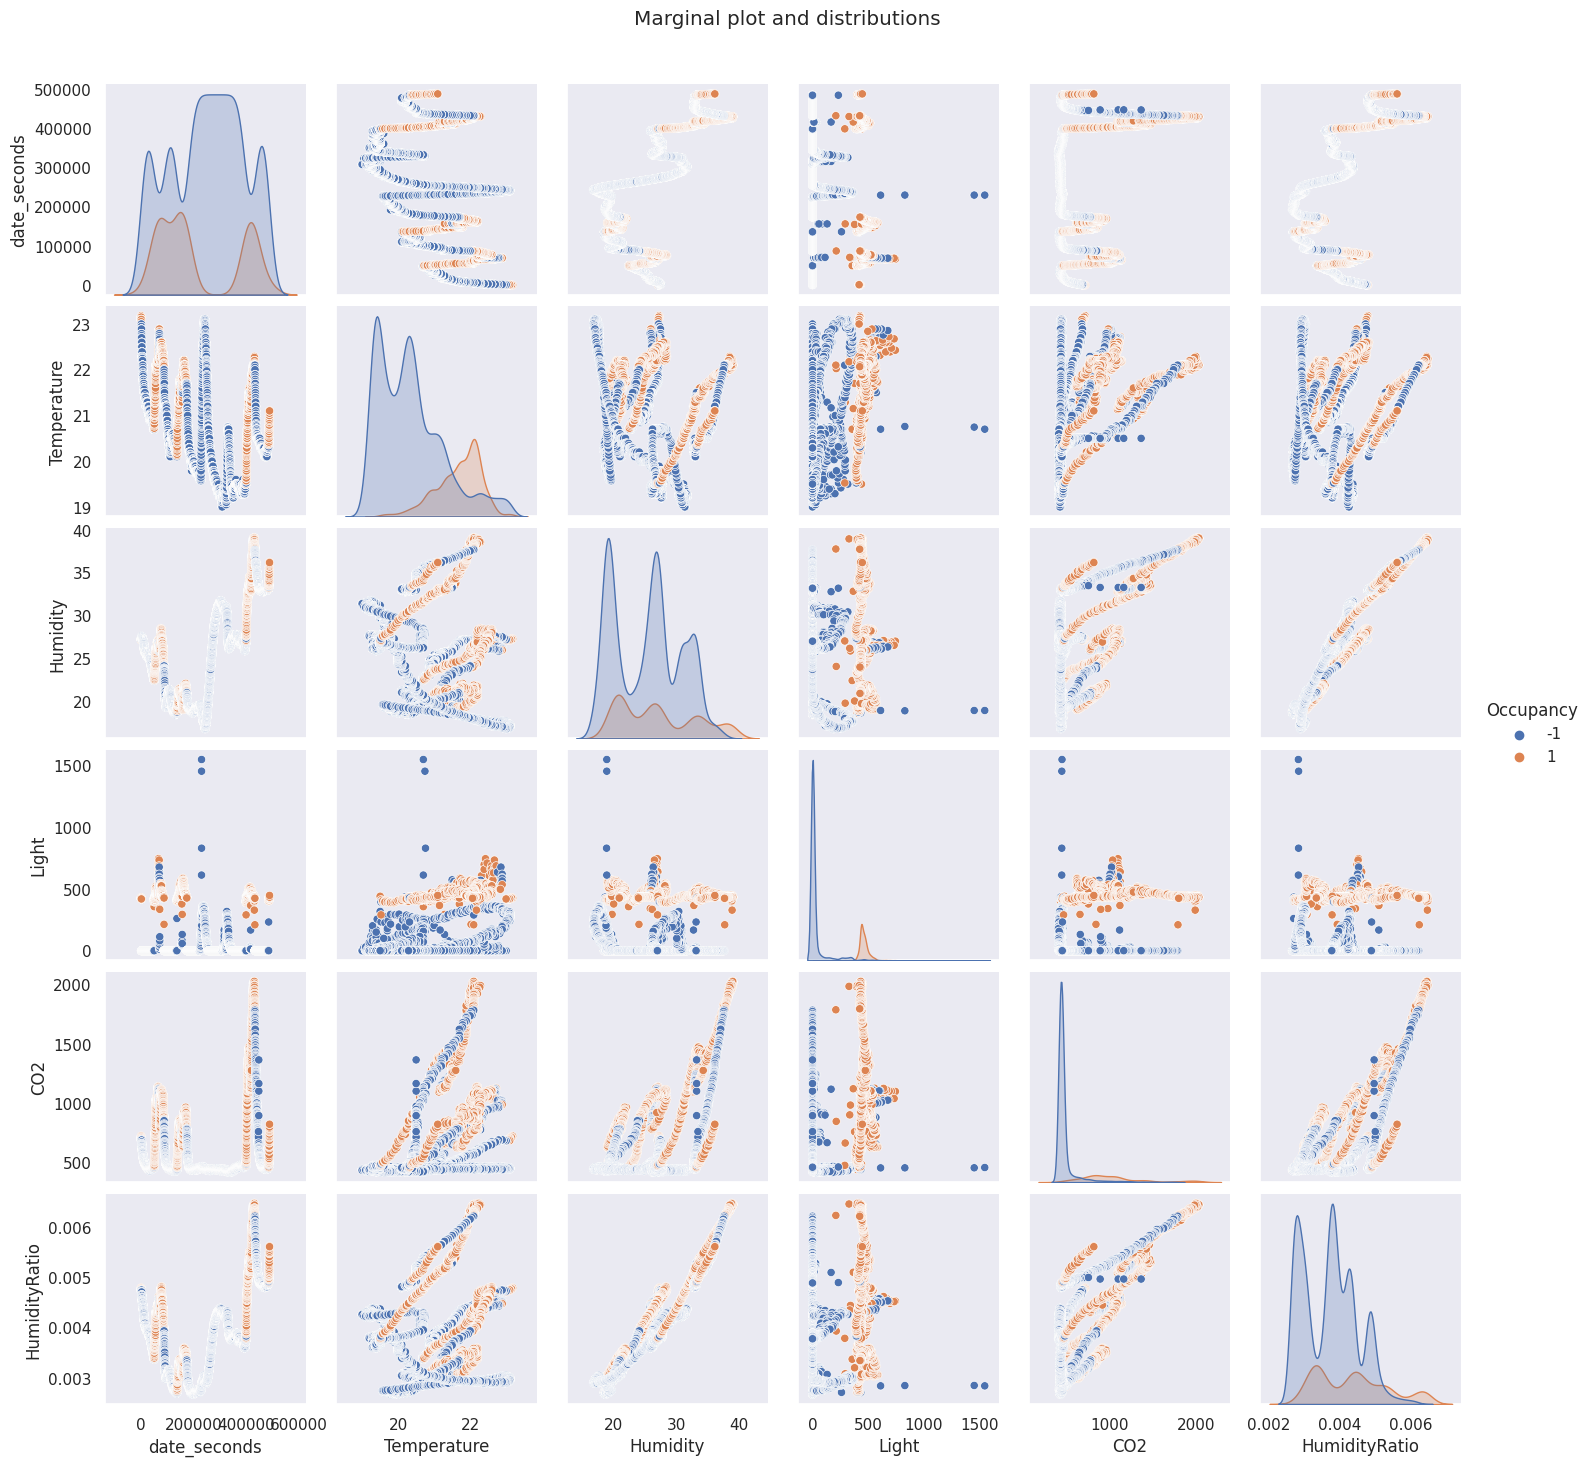

In [42]:
# Visualizing data
sns.set_theme(style="dark")
pair=sns.pairplot(df_occupancy, hue="Occupancy",palette='deep')
pair.fig.subplots_adjust(top=.93)
pair.fig.suptitle('Marginal plot and distributions')

We can see that the distributions of de data in both cases are not distinguible one for another.And also we can see a correlation matrix to see that the data are related to the labels.

<AxesSubplot: title={'center': 'Correlation Matrix'}>

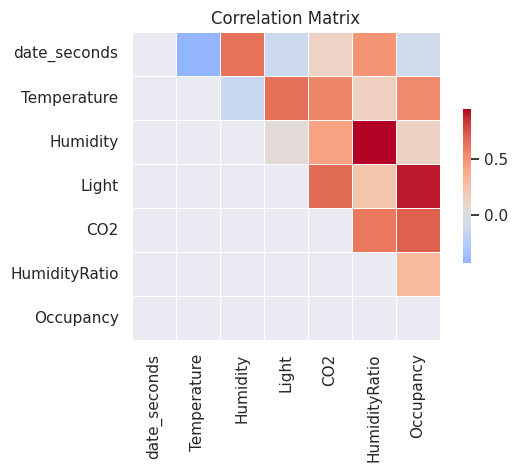

In [43]:
sns.set_theme(style="dark")
corr = df_occupancy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)).T
f, ax = plt.subplots(figsize=(6,4))
ax.set_title("Correlation Matrix")
# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, center=0,cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [44]:
X =df_occupancy.drop('Occupancy',axis=1).values
y= df_occupancy['Occupancy'].values

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, y_train= X,y
X_val, y_val = scaler.transform(df_val_occupancy.drop('Occupancy',axis=1).values),df_val_occupancy['Occupancy'].values
X_test, y_test = scaler.transform(df_test_occupancy.drop('Occupancy',axis=1).values),df_test_occupancy['Occupancy'].values


In [45]:
shuffle(df_test_occupancy['Occupancy'].values)

array([ 1, -1,  1, ...,  1, -1, -1])

Now we are going to see if the data are linearly separable with a logistic regression over all the data

In [46]:
clf = LogisticRegression(tol=0,max_iter=10000)
clf.fit(X,y)

LogisticRegression(max_iter=10000, tol=0)

In [47]:
clf.score(X,y)

0.9856318310205084



With this information we now see that a model can separate with an low error the dataset in to classes. This fact implies that the data are separable, no necessary linearly. But even when we see that the data looks like is not separable, it is.

* ¿Are this dataset randomly chosen?

The paper and data description does not provide details on how the dataset was split. As such, we cannot determine whether the splitting was done randomly or not. However, since the authors have provided the distribution of occupancy labels in each set, we will use their provided splits to ensure consistency with the experimental or theoretical reasons that may have guided their selection.

Text(0.5, 0.98, 'Marginal plot and distributions')

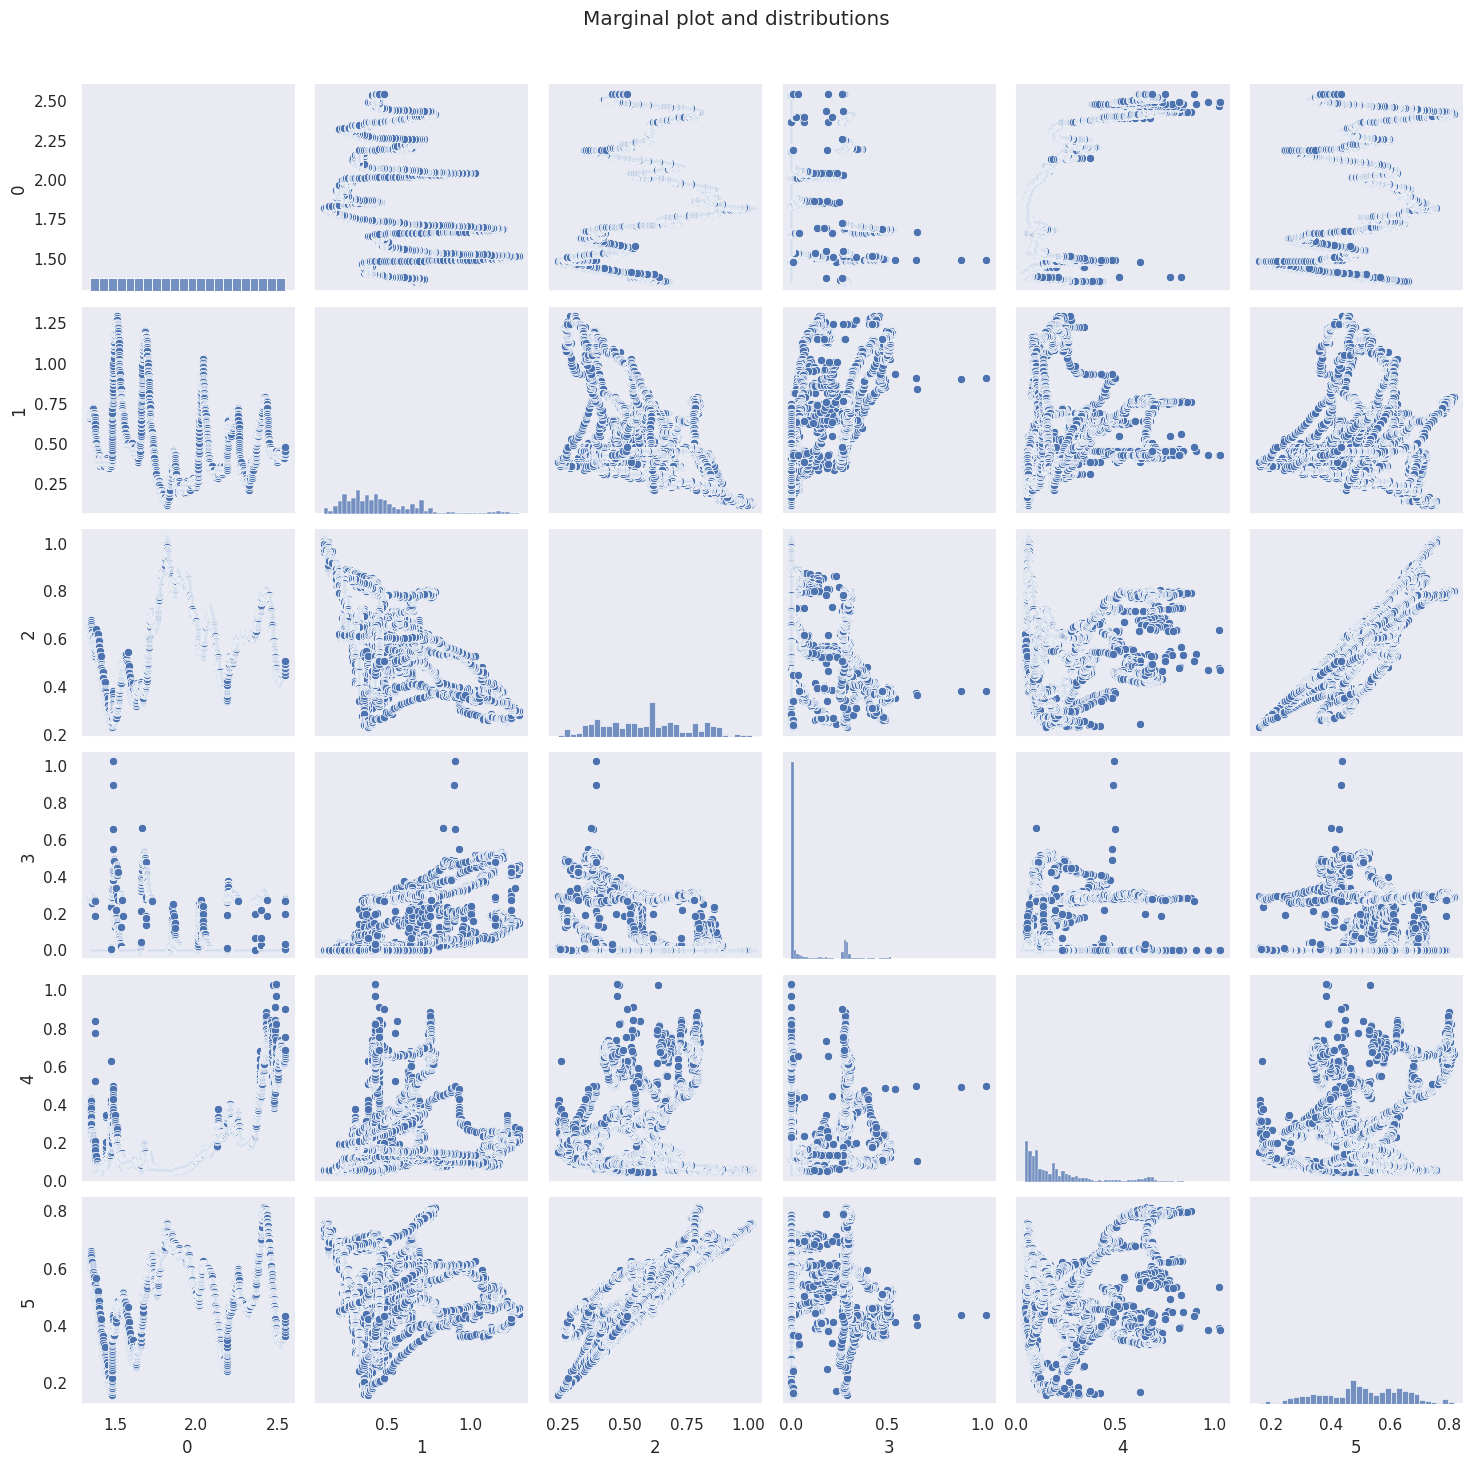

In [48]:
pair=sns.pairplot(pd.DataFrame(X_test))
pair.fig.subplots_adjust(top=.93)
pair.fig.suptitle('Marginal plot and distributions')

We can see that the data of validation set preserves in some way the same distribution of data, but since the data was splited by the researchears we don't give a certain about the random split of the data.

In [49]:
df_occupancy.shape

(8143, 7)

* The sample size is $8143$ and the dimension of every observation are $6$ , the dimesion $VC$ of a support vector machine is $d+1$ , in this case is $7$ then we can use an heuristics that if $N$ fulfil that $10d_{vc}(\mathcal{H})\leq N$ then the model can generalize. In this case $70\leq N$ and for this reason we can give some guarantee of generalization.  

### 4  Provide an explanation how and why the code is working.

To know more about the implementation of the support vector machine, the algorithm of optimization and more, you can check the file *models.py* where are the information and the commented code, in summary we create an object with name *SVM* , now we are going to implement the model.

In [50]:
#Here we create a variable with the object SVM that contains, 
#the model, the optimization algorithm and the evaluation functions
svm = SVM()

This method optimize the algorithm to the data using a form of gradient descent algorithm to optimize the weights and bias of the support vector machine, we determine the data, the epochs and the learning rate, after this the method print the precision and return the weights and bias of the support vector machine.

In [51]:

svm.fit(X_train, y_train,X_val,y_val,learning_rate=0.001,epochs=100)



Precisión:0.9707724425887265


(array([[-0.42483814,  0.07043734, -0.02389367,  3.55921232,  2.28063546,
          0.06148061]]),
 -1.0910000000000508)

### 5 Show some examples to illustrate that the method is working properly.

To do this we create a function with the scaler and the model, in this case we insert the data and see how this works with some examples.

In [52]:
def svm_model(data):
    X=data.drop('Occupancy',axis=1).values
    X=scaler.transform(X)
    return svm.predict(X)

We are going to create and visualize a new dataset named **example data**.

In [53]:
example_data=shuffle(df_occupancy)[:20]
example_data

,date_seconds,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
2214,132779.0,20.390000,18.600000,0.000000,432.666667,0.002748,-1
2434,145980.0,21.340000,21.147500,455.500000,848.250000,0.003315,1
6268,376020.0,19.390000,26.890000,0.000000,467.000000,0.003739,-1
1375,82440.0,22.323333,26.390000,441.000000,1065.333333,0.004400,1
5242,314459.0,19.290000,31.000000,6.000000,436.500000,0.004288,-1
3259,195479.0,20.000000,18.730000,0.000000,433.666667,0.002701,-1
3454,207179.0,19.790000,19.100000,0.000000,438.250000,0.002718,-1
7863,471720.0,20.100000,33.000000,0.000000,451.000000,0.004804,-1
1866,111899.0,20.290000,20.700000,0.000000,446.000000,0.003040,-1
2644,158579.0,21.700000,19.200000,535.500000,633.500000,0.003076,1


Now we are going to make predictions over the dataset and assigns to a new variable named **Prediction** with this we can see if the model works properly, not only in his accuracy, but also in his type of outputs.

In [54]:
example_data['Prediction']=svm_model(example_data)

In [55]:
example_data

,date_seconds,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Prediction
2214,132779.0,20.390000,18.600000,0.000000,432.666667,0.002748,-1,-1.0
2434,145980.0,21.340000,21.147500,455.500000,848.250000,0.003315,1,1.0
6268,376020.0,19.390000,26.890000,0.000000,467.000000,0.003739,-1,-1.0
1375,82440.0,22.323333,26.390000,441.000000,1065.333333,0.004400,1,1.0
5242,314459.0,19.290000,31.000000,6.000000,436.500000,0.004288,-1,-1.0
3259,195479.0,20.000000,18.730000,0.000000,433.666667,0.002701,-1,-1.0
3454,207179.0,19.790000,19.100000,0.000000,438.250000,0.002718,-1,-1.0
7863,471720.0,20.100000,33.000000,0.000000,451.000000,0.004804,-1,-1.0
1866,111899.0,20.290000,20.700000,0.000000,446.000000,0.003040,-1,-1.0
2644,158579.0,21.700000,19.200000,535.500000,633.500000,0.003076,1,1.0


### 6 Provide quantitative evidence for generalization using the provided dataset.

Before to provide quantitative evidence we are going to see some metrics of the model, like precision, loss, accuracy and we are going to calculate $|E_{in}-E_{out}|$ to see that $min(\Omega)=\Omega_{min}=|E_{in}-E_{out}|$

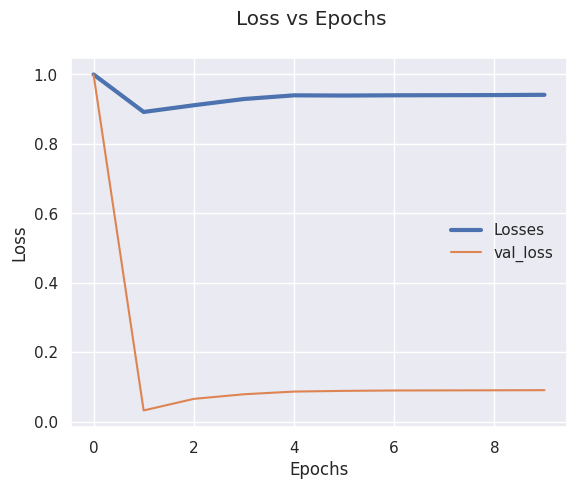

In [56]:
svm.plot_loss()


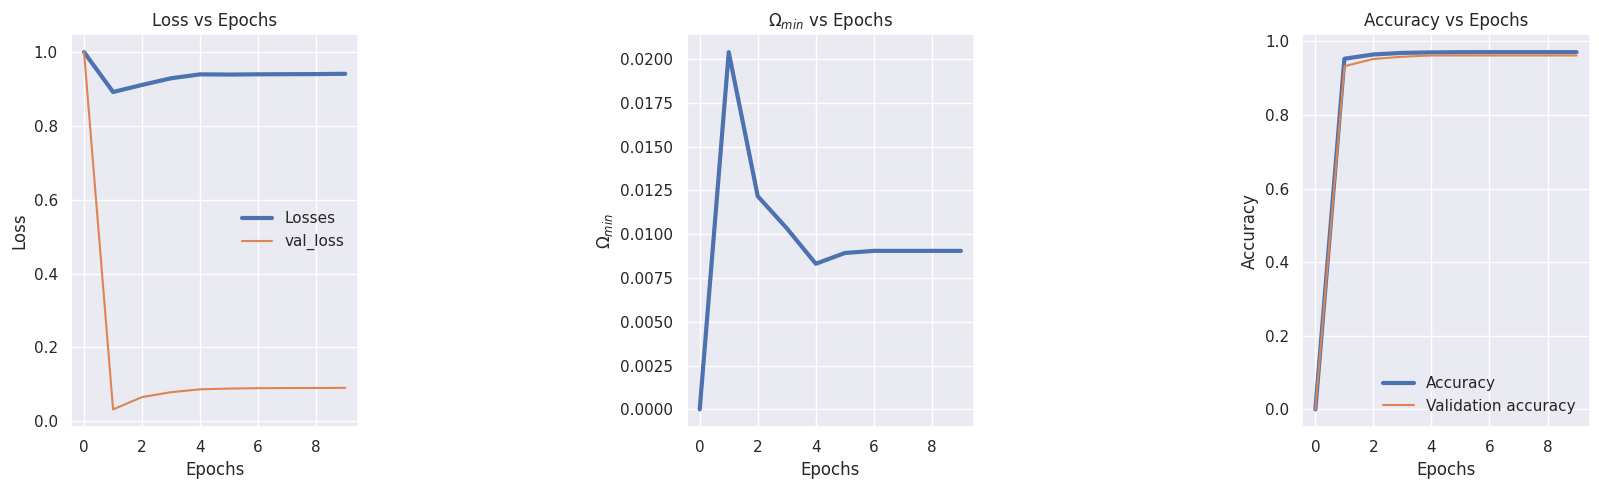

In [57]:
svm.plot_omega()

In [58]:
svm.evaluate_model(X_test,y_test)

True positives:748
True negatives:7677
False positives:26
False negatives:748
Precisión: 0.9664082687338501
Recall: 0.9664082687338501
F1-score: 0.9664082687338501


Precision are our selected metric, because we to detect if a office are occupied or not, since the time its also a variable, running the model later probably we can detect better if the office are or not occupied, but it's so important to know if a office are occupied.